In [1]:
import pandas as pd
import texthero as hero
from texthero import preprocessing

In [2]:
#import os
import sys
#sys.path.append('./nlplot-1.2.0/nlplot')
#import nlplot

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [4]:
df_names = pd.read_table('./protein_names.txt', header = None)
df_uniq_names = pd.read_table('./uniq_protein_names.txt', header = None)

In [5]:
custom_pipeline = [preprocessing.fillna
                   , preprocessing.lowercase
                   , preprocessing.remove_digits
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_whitespace
                   , preprocessing.remove_stopwords # stopword
                  ]

In [6]:
names = hero.clean(df_names[0], custom_pipeline)
uniq_names = hero.clean(df_uniq_names[0], custom_pipeline)

In [9]:
names

0                       protein  unknown function duf2946
1             endonuclease exonuclease phosphatase family
2                                                 kinesin
3                                    hypothetical protein
4                                             carboxylase
                              ...                        
9752                                 hypothetical protein
9753                  u1a small nuclear ribonucleoprotein
9754                                    acetyltransferase
9755                        cytochrome oxidase subunit ix
9756    psp1 c terminal conserved region containing pr...
Name: 0, Length: 9757, dtype: object

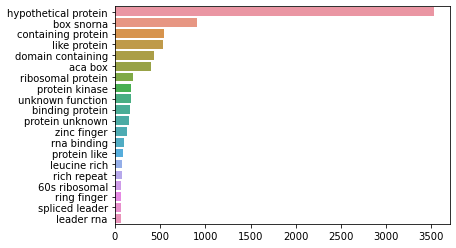

In [7]:
most_common_bi = get_top_text_ngrams(names,20,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))
plt.show()
#plt.savefig("fig.png", format="png", dpi=300, bbox_inches="tight")

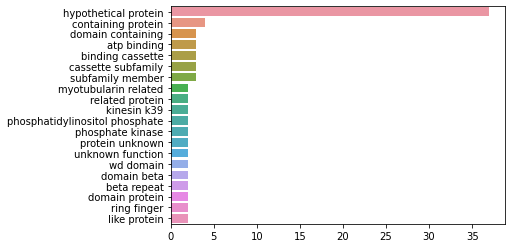

In [8]:
most_common_bi = get_top_text_ngrams(uniq_names,20,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))
plt.show()
#plt.savefig("fig_uniq.png", format="png", dpi=300, bbox_inches='tight')